# **Proyek Pertama Machine Learning Terapan - Predictive Analytics**

**Nama: Zidan Muhammad Ikvan** |
**Cohort ID: MC404D5Y0059** |
**Email: zidanikvan@gmail.com**

## **1. Data Understanding**

Dataset [ini](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality) disediakan dengan murah hati oleh sebuah perusahaan pertanian Amerika. Dataset ini berisi informasi tentang berbagai atribut dari sekumpulan buah apel, yang memberikan wawasan tentang karakteristiknya. Dataset ini mencakup detail seperti  fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.

"Pada bagian ini, kita akan melakukan eksplorasi data untuk memahami struktur dan informasi yang terkandung dalam dataset buah apel. Dataset ini memiliki 4.001 sampel buah apel dengan berbagai karakteristik dan kualitas. Karakteristik yang dimaksud di sini meliputi fitur numerik seperti Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, dan Acidity, serta fitur non-numerik seperti Quality. Kedelapan fitur ini akan digunakan untuk menemukan pola pada data, sedangkan Quality merupakan fitur target yang menunjukkan kelas kualitas buah apel. Kualitas apel dalam dataset ini terbagi menjadi dua kategori: good (baik) dan bad (buruk)."

1. A_id: Pengenal unik untuk setiap buah
2. Size: Ukuran buah
3. Weight: Berat buah
4. Sweetness: Tingkat kemanisan buah
5. Crunchinesss: Tekstur yang menunjukkan kerenyahan buah
6. Juiciness: Tingkat kesegaran buah
7. Ripeness: Tahap kematangan buah
8. Acidity: Tingkat keasaman buah
9. Quality: Kualitas buah secara keseluruhan (Target)


## **2. Import Libray/Package**

pandas & numpy → Manipulasi data.

matplotlib & seaborn → Visualisasi data.

sklearn → Preprocessing data, pembagian dataset, pelatihan model (Random Forest), dan evaluasi kinerja.

In [1]:
# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing Preprocessing data, pembagian dataset, pelatihan model (Random Forest), dan evaluasi kinerja.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## **3. Load Data**

*  Upload file dataset ke Google Colab.
*  Membaca dataset menggunakan pandas.
*  Menampilkan informasi awal DataFrame untuk memastikan dataset sudah benar terbaca.

In [3]:
# Load dataset
df = pd.read_csv('apple_quality.csv')

# Menampilkan 10 data teratas
print("Preview Data:")
display(df.head(10))

Preview Data:


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


## **4. Exploratory Data Analysis**

EDA (Exploratory Data Analysis) bertujuan untuk memahami karakteristik data sebelum digunakan untuk model machine learning. Proses ini membantu kita dalam beberapa aspek penting, seperti:

* Mendeteksi outlier yang dapat memengaruhi performa model

* Mengidentifikasi missing values/duplikat yang perlu diimputasi atau dihapus

* Menganalisis distribusi data untuk memahami penyebaran dan skewness tiap fitur

* Menemukan korelasi antar fitur yang mungkin berpengaruh pada prediksi

* Memahami karakteristik label target, termasuk class imbalance pada kasus klasifikasi

In [5]:
# Info umum dataset
print("\nInfo Dataset:")
print(df.info())


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB
None


In [6]:
# Cek jumlah data hilang (null)
print("\nJumlah Missing Value per Kolom:")
print(df.isnull().sum())


Jumlah Missing Value per Kolom:
A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


In [7]:
# Cek duplikasi data
print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
0


In [8]:
# Menghapus missing values
df = df.dropna()

In [9]:
# Statistik deskriptif untuk fitur numerik
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


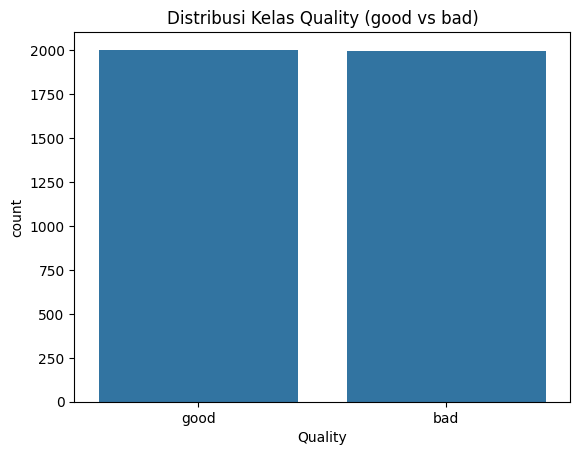

Quality
good    50.1
bad     49.9
Name: proportion, dtype: float64


In [10]:
# Plot distribusi kelas target
sns.countplot(x='Quality', data=df)
plt.title('Distribusi Kelas Quality (good vs bad)')
plt.show()

# Rasio persentase
print(df['Quality'].value_counts(normalize=True) * 100)

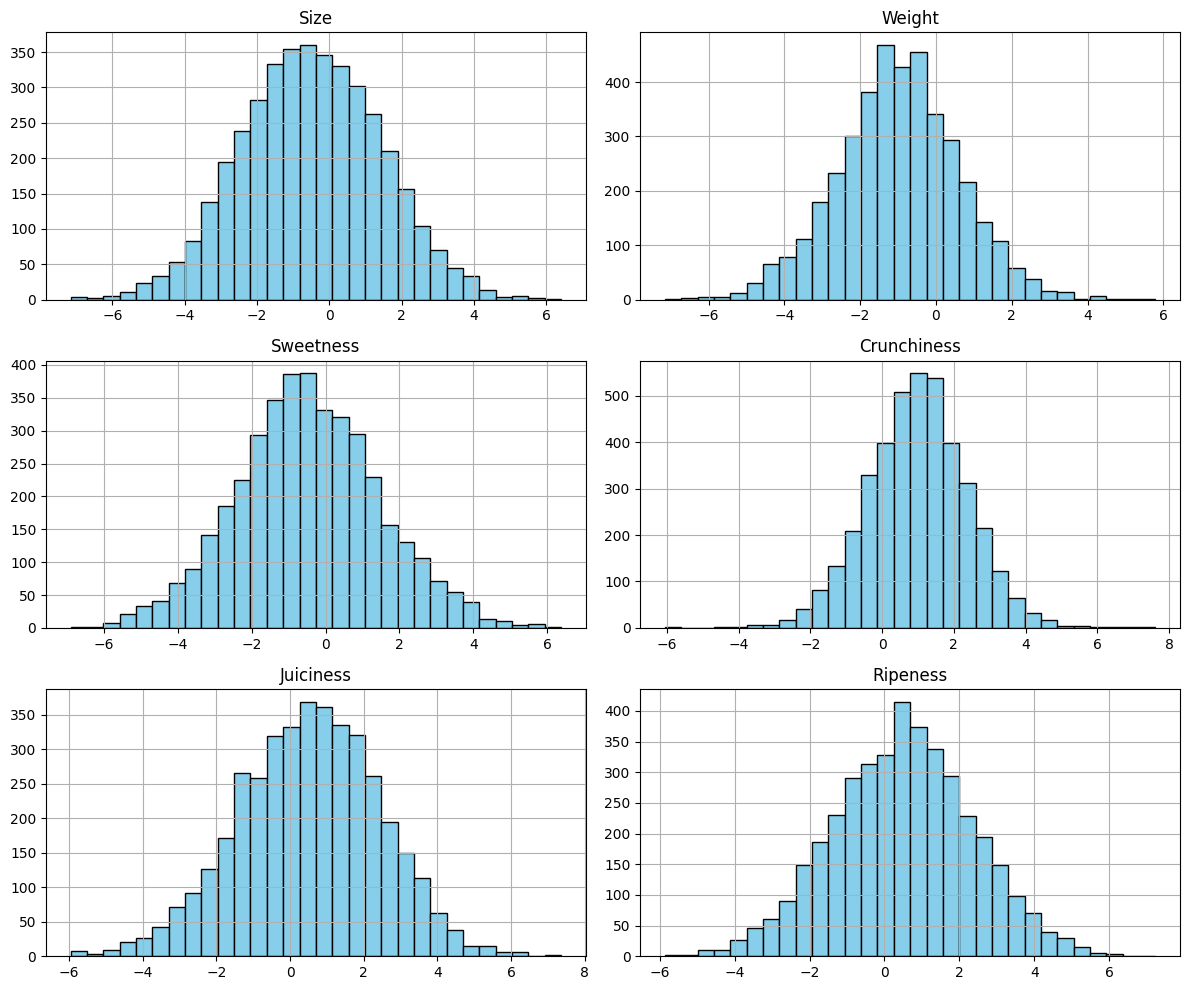

In [11]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness']

# Plot histogram untuk masing-masing fitur
df[numerical_cols].hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

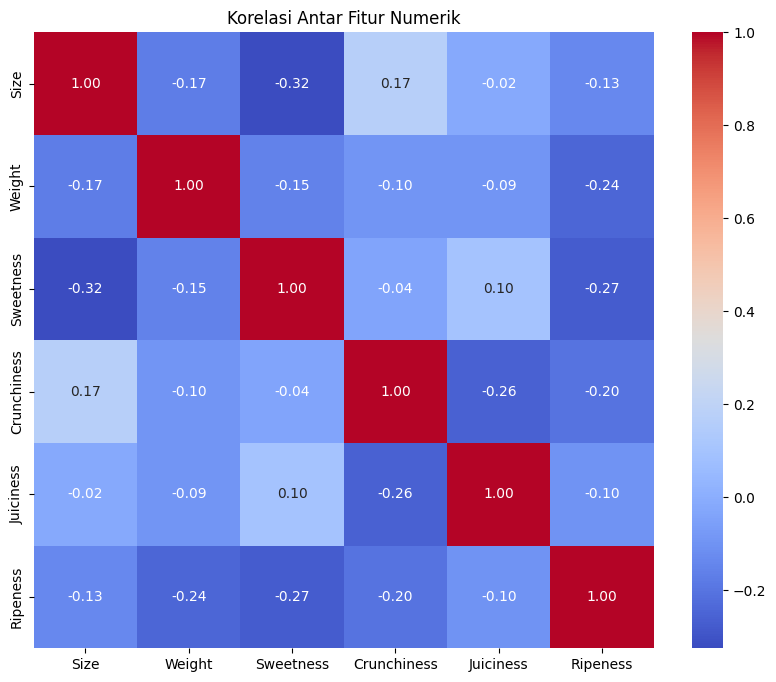

In [12]:
# Hitung korelasi
correlation_matrix = df[numerical_cols].corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

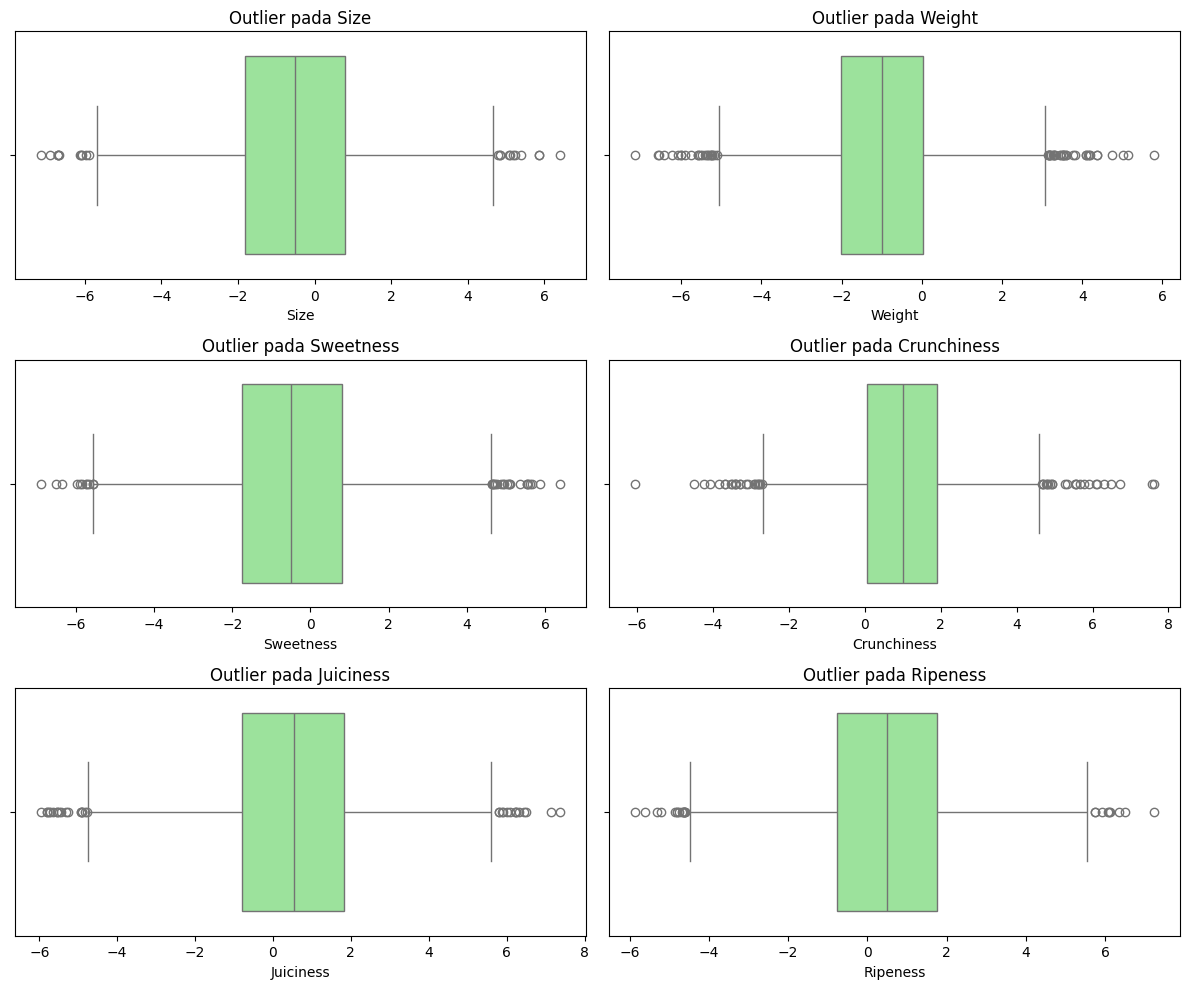

In [13]:
# Boxplot untuk masing-masing fitur numerik
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Outlier pada {col}')
plt.tight_layout()
plt.show()

In [14]:
print("Kolom Object:")
print(df.select_dtypes(include='object').nunique())
print("\nSample Value:")
print(df.select_dtypes(include='object').head())

Kolom Object:
Acidity    4000
Quality       2
dtype: int64

Sample Value:
        Acidity Quality
0  -0.491590483    good
1  -0.722809367    good
2   2.621636473     bad
3   0.790723217    good
4   0.501984036    good


## **5. Data Preparation**

Data preparation merupakan tahap penting dalam mempersiapkan data sebelum pemodelan machine learning. Proses ini bertujuan untuk memastikan data dalam format yang sesuai dan optimal untuk diproses oleh algoritma.

Tahapan utama yang dilakukan meliputi:

* Konversi tipe data untuk memastikan konsistensi format

* Pemisahan fitur (X) dan target (y) untuk pembelajaran model

* Pembagian data training dan testing untuk evaluasi yang valid

* Normalisasi/scaling untuk menyamakan skala fitur

* Pengecekan final shape sebelum pemodelan

Dengan melakukan persiapan data secara menyeluruh, kita dapat meningkatkan kualitas model dan mencegah masalah yang mungkin timbul selama proses machine learning.

In [15]:
# Ubah 'Acidity' jadi float
df['Acidity'] = df['Acidity'].astype(float)

# Ubah 'Quality' jadi 0/1 | 0 = bad, 1 = good
df['Quality'] = df['Quality'].map({'bad': 0, 'good': 1})

In [16]:
# Pemisahan Fitur dan Target
X = df.drop(columns=['A_id', 'Quality'])
y = df['Quality']

In [17]:
# Pembagian Data: Train-Test Split 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Standarisasi Fitur Numerik (Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Mengecek Final Shape dan Siap Modeling
print("X_train:", X_train_scaled.shape)
print("X_test:", X_test_scaled.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (3200, 7)
X_test: (800, 7)
y_train: (3200,)
y_test: (800,)


## **6. Modelling**

Mengimplementasikan classifier Random Forest menggunakan data training yang telah dipersiapkan. Metode ensemble ini membangun banyak decision tree untuk meningkatkan performa prediksi dan mengurangi overfitting.

Langkah utama:

* Inisialisasi model dengan random_state=42 untuk hasil yang reproducible

* Melatih model menggunakan fitur yang telah discale (X_train_scaled) dan label (y_train)

Parameter default Random Forest memberikan baseline yang kuat, yang nantinya bisa dioptimasi melalui hyperparameter tuning jika diperlukan.

In [20]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## **7. Evaluasi**

* Memeriksa apakah model mengalami overfitting (akurasi train jauh lebih tinggi dari test)

* Mengukur performa model secara objektif menggunakan metrik standar

* Memastikan model dapat bekerja dengan baik pada data yang belum pernah dilihat sebelumnya
* Menampilkan classification report yang berisi: Precision, Recall, F1-score, Support

In [21]:
# Prediksi pada data latih
rf_train_pred = rf_model.predict(X_train_scaled)

# Evaluasi Random Forest (Train)
print("=== Random Forest (Train Data) ===")
print(confusion_matrix(y_train, rf_train_pred))
print(classification_report(y_train, rf_train_pred))

=== Random Forest (Train Data) ===
[[1597    0]
 [   0 1603]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1597
           1       1.00      1.00      1.00      1603

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



In [22]:
# Prediksi pada data test
rf_pred = rf_model.predict(X_test_scaled)

# Evaluasi Random Forest
print("=== Random Forest (test) ===")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


=== Random Forest (test) ===
[[335  64]
 [ 34 367]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       399
           1       0.85      0.92      0.88       401

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



## **8. Model Tuned & Evaluasi**

1. Tuning (GridSearchCV)

    - Mencari kombinasi parameter terbaik untuk meningkatkan performa model

    - Mencegah overfitting/underfitting

2. Evaluasi

    - Memvalidasi kemampuan model pada data training dan testing

    - Memastikan model memiliki generalisasi yang baik

In [23]:
# Inisialisasi model dasar
rf_model = RandomForestClassifier(random_state=42)

# Daftar parameter yang akan diuji
param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 5],
    'max_features': ['sqrt', 'log2']
}

# GridSearch dengan 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit model ke data training
grid_search.fit(X_train_scaled, y_train)

# Tampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 150}


In [24]:
# Random Forest dengan parameter terbaik dari GridSearchCV
rf_model_tuned = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42
)

# Latih model
rf_model_tuned.fit(X_train_scaled, y_train)

# Evaluasi di data latih & data uji

print("=== Random Forest (Train Data, Tuned) ===")
y_train_pred = rf_model_tuned.predict(X_train_scaled)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

print("=== Random Forest (Test Data, Tuned) ===")
y_test_pred = rf_model_tuned.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

=== Random Forest (Train Data, Tuned) ===
[[1567   30]
 [  24 1579]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1597
           1       0.98      0.99      0.98      1603

    accuracy                           0.98      3200
   macro avg       0.98      0.98      0.98      3200
weighted avg       0.98      0.98      0.98      3200

=== Random Forest (Test Data, Tuned) ===
[[332  67]
 [ 39 362]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       399
           1       0.84      0.90      0.87       401

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



## **9. Inference**

Tujuan Inference:

- Menguji kemampuan model pada data baru yang belum pernah diproses sebelumnya

- Memverifikasi performa model dalam kondisi nyata

- Memberikan insight tentang keputusan model melalui probabilitas prediksi

1. Inference dengan Data Dummy

  * Membuat data contoh baru yang mensimulasikan input nyata

  * Melakukan prediksi kualitas apel (Good/Bad) beserta probabilitasnya

  * Menampilkan hasil prediksi bersama dengan data input



In [25]:
# Data dummy untuk inference
data_inference = pd.DataFrame({
    'Size': [0.2, -0.8, 1.1, -0.5, 0.0],
    'Weight': [-0.1, 0.6, -1.2, 0.9, -0.3],
    'Sweetness': [2.0, 1.3, -0.8, 2.8, -1.1],
    'Crunchiness': [0.6, -1.0, 1.5, 0.8, -0.2],
    'Juiciness': [1.2, -0.5, 2.4, 0.7, -1.4],
    'Ripeness': [0.1, 1.0, 0.2, 1.8, -0.6],
    'Acidity': [-0.4, 0.9, -1.0, 0.1, -2.0]
})

In [26]:
# Inference: Prediksi kualitas apel dengan model Random Forest yang sudah dituning
prediksi_kualitas = rf_model_tuned.predict(data_inference)
prediksi_probabilitas = rf_model_tuned.predict_proba(data_inference)

# Menampilkan hasil
hasil = data_inference.copy()
hasil['Predicted Quality'] = prediksi_kualitas
hasil['Probability (Bad)'] = prediksi_probabilitas[:, 0]
hasil['Probability (Good)'] = prediksi_probabilitas[:, 1]

print(hasil)

   Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity  \
0   0.2    -0.1        2.0          0.6        1.2       0.1     -0.4   
1  -0.8     0.6        1.3         -1.0       -0.5       1.0      0.9   
2   1.1    -1.2       -0.8          1.5        2.4       0.2     -1.0   
3  -0.5     0.9        2.8          0.8        0.7       1.8      0.1   
4   0.0    -0.3       -1.1         -0.2       -1.4      -0.6     -2.0   

   Predicted Quality  Probability (Bad)  Probability (Good)  
0                  1           0.078033            0.921967  
1                  1           0.405394            0.594606  
2                  1           0.205770            0.794230  
3                  0           0.539397            0.460603  
4                  0           0.771476            0.228524  


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


2. Inference dengan Data Test

    * Mengambil sample data dari test set yang belum pernah dilihat model

    * Membandingkan hasil prediksi dengan label sebenarnya (actual)

    * Menampilkan probabilitas prediksi untuk setiap kelas

In [27]:
# Ambil 5 data dari test set untuk inference dengan label asli
X_infer = X_test.iloc[:5]
y_actual = y_test.iloc[:5]

# Prediksi dengan model Random Forest yang sudah dituning
y_pred = rf_model_tuned.predict(X_infer)
y_proba = rf_model_tuned.predict_proba(X_infer)

# Gabungkan hasil prediksi dan label asli
hasil_inferensi = X_infer.copy()
hasil_inferensi['Actual'] = y_actual.values
hasil_inferensi['Predicted'] = y_pred
hasil_inferensi['Probability (Bad)'] = y_proba[:, 0]
hasil_inferensi['Probability (Good)'] = y_proba[:, 1]

# Tampilkan
print(hasil_inferensi)

          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
1911 -1.234221 -0.242814   0.089992     1.525912   0.814106  0.186102   
1788  1.523458 -2.410581  -2.873685     3.166517  -2.212093  0.407928   
3585 -0.142390 -1.182126   1.720323     2.314596  -1.272217 -1.510105   
3982 -2.434450  0.280785   0.426244     0.924208   1.439966  0.517793   
615   2.275232 -1.197066  -3.300744    -1.989807   3.369321  1.931644   

       Acidity  Actual  Predicted  Probability (Bad)  Probability (Good)  
1911 -2.553685       1          1           0.260667            0.739333  
1788 -0.068995       1          0           0.527556            0.472444  
3585  0.351050       0          0           0.716551            0.283449  
3982 -2.334245       1          1           0.386074            0.613926  
615   2.191253       1          0           0.518446            0.481554  


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
